In [2]:
%cd ..

/Users/mateoibarguen/Desktop/DATA-Capstone


In [3]:
from models.networks.lstm_models import *
from models.spectra_preprocessor import *
from models.run_train import *
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
from tensorflow.keras.layers import Input

Using TensorFlow backend.


Failed to load example_set_03
Failed to load example_set_04
Failed to load set_nc50_ns1000_v2
Failed to load set_num_shell_modes
Failed to load test_02
Failed to load example_set_03
Failed to load example_set_04
Failed to load set_nc50_ns1000_v2
Failed to load set_num_shell_modes
Failed to load test_02
Failed to load example_set_03
Failed to load example_set_04
Failed to load set_nc50_ns1000_v2
Failed to load set_num_shell_modes
Failed to load test_02
Failed to load example_set_03
Failed to load example_set_04
Failed to load set_nc50_ns1000_v2
Failed to load set_num_shell_modes
Failed to load test_02


### Load Model

In [4]:
model_dataset_config = 'example_set'
dataset_config, model_nc50 = initialize_model(dataset_name=model_dataset_config, model_name="GoogleModel", model_module_index=2, num_channels=50, num_instances=100)
model_nc50.persist("GoogleModel_BC-1234-50c-all.0513.2202")

model_module_index:  2
loaded_modules:  [(<module 'models.networks.abstract_models' from '/Users/mateoibarguen/Desktop/DATA-Capstone/models/networks/abstract_models/__init__.py'>, 'models.networks.abstract_models'), (<module 'models.networks.ensemble_models' from '/Users/mateoibarguen/Desktop/DATA-Capstone/models/networks/ensemble_models.py'>, 'models.networks.ensemble_models'), (<module 'models.networks.lstm_models' from '/Users/mateoibarguen/Desktop/DATA-Capstone/models/networks/lstm_models.py'>, 'models.networks.lstm_models')]
Using default parameters: {'conv_1': 16, 'conv_2': 32, 'bi_1': 128, 'bi_2': 128, 'drop_1': 0.01, 'dense_1': 64, 'drop_2': 0.05}


In [5]:
# model_dataset_config = 'example_set'
# dataset_config, model_nc10 = initialize_model(dataset_name=model_dataset_config, model_name="GoogleModel", model_module_index=2, num_channels=10, num_instances=100)
# model_nc10.persist("GoogleModel_set_nc10_ns200k.0310.1410")

### Load Data

In [79]:
dataset_name = "set_nc50_ns1000_v2"
spectra_pp = SpectraPreprocessor(dataset_name, num_channels=50, 
                                 num_instances=None, use_generator=False)

X_train, y_train = spectra_pp.get_data(spectra_pp.train_spectra_loader)
y_train_ns = [s.n_shell for s in spectra_pp.train_spectra_loader.spectra]
y_train_preds = np.argmax(model_nc50.get_preds(X_train), axis=1) + 1
y_train_true = np.argmax(y_train, axis=1) + 1

classification_df = pd.DataFrame()
classification_df['y_true'] = y_train_true
classification_df['y_pred'] = y_train_preds
classification_df['ns'] = y_train_ns

In [77]:
for ns in sorted(classification_df['ns'].unique()):
    subset_ns = classification_df[classification_df['ns'] == ns]
    print(accuracy_score(subset_ns['y_true'], subset_ns['y_pred']))

0.8727272727272727
0.8253012048192772
0.8466257668711656
0.7640449438202247
0.8033707865168539


### Let's try a completely unique dataset

In [11]:
dataset_name = "example_set_03"
spectra_pp = SpectraPreprocessor(dataset_name, num_channels=50, 
                                 num_instances=None, use_generator=False)

X_train, y_train = spectra_pp.get_data(spectra_pp.train_spectra_loader)
y_train_ns = [s.n_shell for s in spectra_pp.train_spectra_loader.spectra]
y_train_preds = np.argmax(model_nc50.get_preds(X_train), axis=1) + 1
y_train_true = np.argmax(y_train, axis=1) + 1

classification_df = pd.DataFrame()
classification_df['y_true'] = y_train_true
classification_df['y_pred'] = y_train_preds
classification_df['ns'] = y_train_ns

for ns in sorted(classification_df['ns'].unique()):
    print(ns)
    subset_ns = classification_df[classification_df['ns'] == ns]
    print(accuracy_score(subset_ns['y_true'], subset_ns['y_pred']))
    print(classification_report(subset_ns['y_true'], subset_ns['y_pred']))
    print()

1.0
0.8210526315789474
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.90      1.00      0.95        27
           3       0.68      0.54      0.60        24
           4       0.68      0.74      0.71        23

    accuracy                           0.82        95
   macro avg       0.82      0.82      0.82        95
weighted avg       0.81      0.82      0.81        95


2.0
0.788235294117647
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.85      1.00      0.92        22
           3       0.55      0.63      0.59        19
           4       0.78      0.56      0.65        25

    accuracy                           0.79        85
   macro avg       0.79      0.80      0.79        85
weighted avg       0.79      0.79      0.78        85


3.0
0.8037383177570093
              precision    recall  f1-score   support

     

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

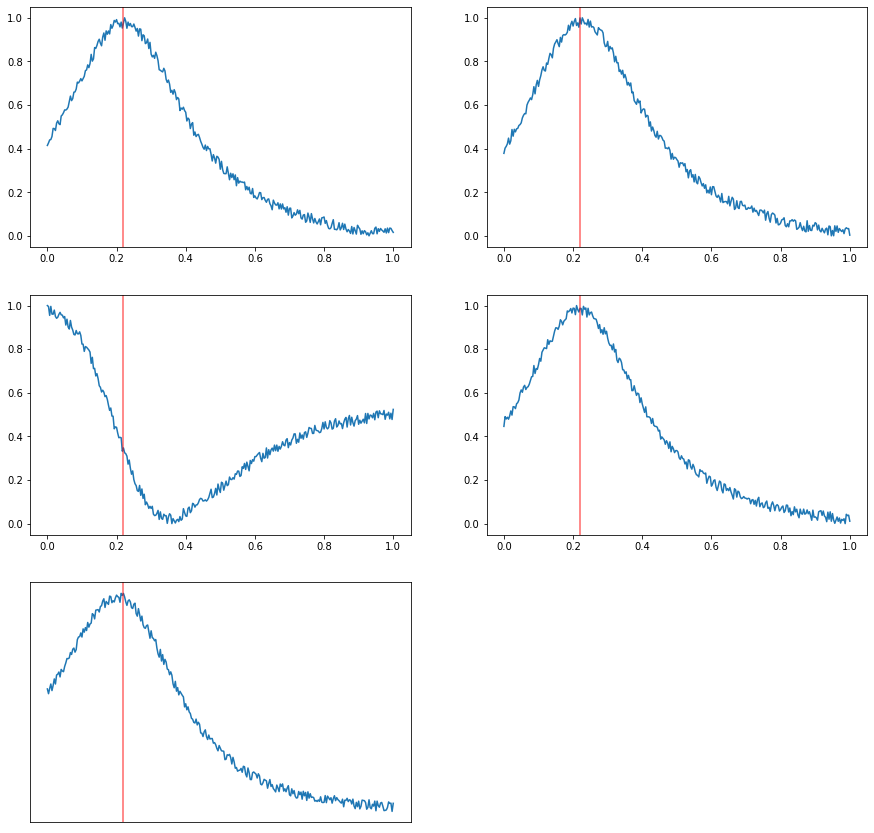

In [9]:
spectra_pp.train_spectra_loader.spectra[0].plot_channels(size=None, num_channels=5)

In [12]:
dataset_name = "set_num_shell_modes"
spectra_pp = SpectraPreprocessor(dataset_name, num_channels=50, 
                                 num_instances=None, use_generator=False)

X_train, y_train = spectra_pp.get_data(spectra_pp.train_spectra_loader)
y_train_ns = [s.n_shell for s in spectra_pp.train_spectra_loader.spectra]
y_train_preds = np.argmax(model_nc50.get_preds(X_train), axis=1) + 1
y_train_true = np.argmax(y_train, axis=1) + 1

classification_df = pd.DataFrame()
classification_df['y_true'] = y_train_true
classification_df['y_pred'] = y_train_preds
classification_df['ns'] = y_train_ns

for ns in sorted(classification_df['ns'].unique()):
    print(ns)
    subset_ns = classification_df[classification_df['ns'] == ns]
    print(accuracy_score(subset_ns['y_true'], subset_ns['y_pred']))
    print(classification_report(subset_ns['y_true'], subset_ns['y_pred']))
    print()

1.0
0.7872340425531915
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.90      1.00      0.95         9
           3       0.71      0.62      0.67        16
           4       0.58      0.64      0.61        11

    accuracy                           0.79        47
   macro avg       0.80      0.82      0.81        47
weighted avg       0.79      0.79      0.78        47


2.0
0.7419354838709677
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.67      0.86      0.75         7
           3       0.57      0.44      0.50         9
           4       0.71      0.71      0.71         7

    accuracy                           0.74        31
   macro avg       0.74      0.75      0.74        31
weighted avg       0.74      0.74      0.73        31


3.0
0.7551020408163265
              precision    recall  f1-score   support

    

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.89      0.73      0.80        11
           3       0.53      0.62      0.57        13
           4       0.65      0.65      0.65        17

    accuracy                           0.74        53
   macro avg       0.77      0.75      0.75        53
weighted avg       0.75      0.74      0.74        53


37.0
0.7
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.70      0.82        10
           3       0.54      0.54      0.54        13
           4       0.45      0.62      0.53         8

    accuracy                           0.70        40
   macro avg       0.75      0.72      0.72        40
weighted avg       0.74      0.70      0.71        40


38.0
0.8717948717948718
              precision    recall  f1-score   support

           1       1.00      1.00      1

              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.57      0.73         7
           3       0.50      0.40      0.44        10
           4       0.60      0.82      0.69        11

    accuracy                           0.68        34
   macro avg       0.74      0.70      0.70        34
weighted avg       0.70      0.68      0.67        34


72.0
0.6857142857142857
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.71      0.56      0.63         9
           3       0.33      0.43      0.38         7
           4       0.70      0.78      0.74         9

    accuracy                           0.69        35
   macro avg       0.69      0.67      0.67        35
weighted avg       0.72      0.69      0.70        35


73.0
0.5277777777777778
              precision    recall  f1-score   support

           1       1.00  

### New Parameters

In [40]:
model_dataset_config = 'example_set'
dataset_config, model_new = initialize_model(dataset_name=model_dataset_config, model_name="GoogleModel", model_module_index=2, num_channels=50, num_instances=100)
model_new.persist("GoogleModel_BC-1234-50c-all.0513.2202")
trained_model = model_new.keras_model
model_config = trained_model.get_config()

model_module_index:  2
loaded_modules:  [(<module 'models.networks.abstract_models' from '/Users/mateoibarguen/Desktop/DATA-Capstone/models/networks/abstract_models/__init__.py'>, 'models.networks.abstract_models'), (<module 'models.networks.ensemble_models' from '/Users/mateoibarguen/Desktop/DATA-Capstone/models/networks/ensemble_models.py'>, 'models.networks.ensemble_models'), (<module 'models.networks.lstm_models' from '/Users/mateoibarguen/Desktop/DATA-Capstone/models/networks/lstm_models.py'>, 'models.networks.lstm_models')]
Using default parameters: {'conv_1': 16, 'conv_2': 32, 'bi_1': 128, 'bi_2': 128, 'drop_1': 0.01, 'dense_1': 64, 'drop_2': 0.05}


In [28]:
trained_model._layers[0].batch_input_shape = (1301, 50)

In [41]:
num_timesteps = 1301
num_channels = 50

num_attention = 1301 - 8

model = Sequential()
model.add(Conv1D(16, 5, input_shape=(num_timesteps, num_channels)))
model.add(BatchNormalization())
model.add(Conv1D(32, 5))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(128, return_sequences=True)))

model.add(Attention(num_attention))
model.add(Dropout(0.01))
model.add(Dense(64, activation='elu'))
model.add(Dropout(0.05))
model.add(Dense(4, activation='softmax'))

In [38]:
x = X_train
display(x.shape)
tf.keras.layers.ZeroPadding1D((500, 500))(x)

(300, 1301, 50)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: shape=(300, 1303, 50), dtype=float32, numpy=
array([[[0.0105306 , 0.00964255, 0.01075701, ..., 0.02327239,
         0.01315863, 0.02138523],
        [0.01605702, 0.01132187, 0.00381321, ..., 0.01660829,
         0.01586193, 0.01094922],
        [0.00630186, 0.0192678 , 0.0181671 , ..., 0.02042453,
         0.01955926, 0.02019253],
        ...,
        [0.61522055, 0.6084832 , 0.58898604, ..., 0.25973567,
         0.2602335 , 0.26216698],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.0340401 , 0.018942  , 0.01296366, ..., 0.028601  ,
         0.01979943, 0.01524982],
        [0.02128992, 0.01725907, 0.02094444, ..., 0.02937901,
         0.03367638, 0.04292737],
        [0.03512124, 0.02286869, 0.02719759, ..., 0.05149933,
         0.0490666 , 0.04208515],
        ...,
        [0.01064514, 0.00359095, 0.00721593, ..., 0

In [56]:
i = 0
for layer in model.layers:
    old_layer_weights = trained_model.layers[i].get_weights()
    try:
        layer.set_weights(old_layer_weights)
    except:
        print('here')
        print(len(old_layer_weights[0]))
        print(old_layer_weights[1])
        padded = tf.keras.layers.ZeroPadding1D(338)(old_layer_weights[0]), tf.keras.layers.ZeroPadding1D(338)(old_layer_weights[1])
        print(padded)
        layer.set_weights(padded)
    i += 1

here
256
[ 1.4509193   0.67279226 -0.04098493 -0.05564933  0.2817472   0.2952956
  0.4737183   0.1005329   0.30042475  0.7266093   0.92926246  0.60633206
  0.33504894  0.56490535  0.9456682   0.99601907  0.8722986   0.2373997
  0.14451188  0.49003726  0.246565    0.3745143   0.37089562  0.30766216
  0.11630274  0.4167805   0.8927391   0.8063228   0.44080514  0.03742129
 -0.16252352 -0.41541272 -0.5724011   0.4069777   0.8614833   0.7663242
  0.4537767   0.5867711   0.75291413  0.85298437  0.9227726   0.4896667
 -0.14097017 -0.28682217 -0.26806432  0.26882735  0.08718569  0.35847142
  0.40549242  0.2726314   0.09411301 -0.647014    0.00353602  0.01670309
 -0.03532452 -0.20085357  0.14508612  0.14922346  0.26493916  0.36619893
  0.29359144  0.551626    0.6302671   0.6255627   0.11820678  0.46521607
  0.36344773 -0.03543078 -0.153095   -0.1689299   0.00822239 -0.55662173
  0.09503531 -0.16915676  0.04256454  0.36872348  0.5019124   0.66244566
  0.3149929   0.5225792   0.32168776  0.547854

ValueError: Input 0 of layer zero_padding1d_18 is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: [256]

In [49]:
import tensorflow as tf

In [12]:
raw_inputs = [
  [83, 91, 1, 645, 1253, 927],
  [73, 8, 3215, 55, 927],
  [711, 632, 71]
]

padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                              padding='post')

print(padded_inputs)

[[  83   91    1  645 1253  927]
 [  73    8 3215   55  927    0]
 [ 711  632   71    0    0    0]]


In [37]:
# from keras.layers import Input
# from keras.models import Model

# newInput = Input(shape=(1301, 50))
# newOutputs = model(newInput)

# newModel = Model(newInput,newOutputs)

In [49]:
#model._layers.pop(0)
model._layers[0]._batch_input_shape = new_input_shape

In [50]:
model._layers

In [57]:
import tensorflow as tf
#new_model = tf.keras.models.model_from_json(model.to_json())

In [60]:
model_config = model.get_config()
model_config['layers'][0] = {
                      'name': 'new_input',
                      'class_name': 'InputLayer',
                      'config': {
                          'batch_input_shape': (None, 300, 300),
                          'dtype': 'float32',
                          'sparse': False,
                          'name': 'new_input'
                      },
                      'inbound_nodes': []
                  }
model_config['layers'][1]['inbound_nodes'] = [[['new_input', 0, 0, {}]]]
model_config['input_layers'] = [['new_input', 0, 0]]

In [14]:
#new_model = model.__class__.from_config(model_config, custom_objects={})  # change custom objects if necessary

In [51]:
model.predict(X_train)

TypeError: Dimension value must be integer or None or have an __index__ method, got <tf.Tensor 'strided_slice_6:0' shape=(1301,) dtype=float32>

In [15]:
dataset_name = "example_set_04"
spectra_pp = SpectraPreprocessor(dataset_name, num_channels=50, 
                                 num_instances=None, use_generator=False)

X_train, y_train = spectra_pp.get_data(spectra_pp.test_spectra_loader)
# y_train_ns = [s.n_shell for s in spectra_pp.train_spectra_loader.spectra]
# y_train_preds = np.argmax(new_model.predict(X_train), axis=1) + 1
# y_train_true = np.argmax(y_train, axis=1) + 1

# print(classification_report(y_train_true, y_train_preds))

In [ ]:
#model_new.get_preds(X_train)

### Issue with the data

In [29]:
# num_instances = 2
# num_channels = 3

# dm_reshaped = np.array(dm[:num_instances])[:, :num_channels, :]

# original_nc = 5
# additional_nc =1

# dm = np.array(spectra_pp.train_spectra_loader.get_dm()[:num_instances])[:, :original_nc, :]
# dm_padded = pad(dm, additional_nc)
# dm_reshaped = dm_padded.reshape(dm_padded.shape[0], dm_padded.shape[2], dm_padded.shape[1])

In [30]:
def pad(X, additional_nc, pad_mode):
    """
    constant default is 0.
    """
    
    return np.pad(X, ((0, 0), (0, additional_nc), (0, 0)), pad_mode)

In [31]:
def evaluate_model_padded(dataset_name, model, original_nc, target_nc, pad_mode, num_instances=200):
    
    spectra_pp = SpectraPreprocessor(dataset_name=dataset_name, num_channels=original_nc,
                                     num_instances=num_instances, use_generator=False)
    
    X_train, y_train = spectra_pp.transform_train()
    additional_nc = target_nc - original_nc
    dm = np.array(spectra_pp.train_spectra_loader.get_dm()[:num_instances])[:, :original_nc, :]
    
    dm_padded = pad(dm, additional_nc, pad_mode)
    dm_reshaped = dm_padded.reshape(dm_padded.shape[0], dm_padded.shape[2], dm_padded.shape[1])

    eval_results = model.evaluate(dm_reshaped, y_train)
    
    eval_metrics = eval_results['metrics_names']
    eval_scores = eval_results['metrics']
    eval_dict = {metric_name: score for metric_name, score in zip(eval_metrics, eval_scores)}
    eval_dict.update({'original_nc': original_nc, 'pad_mode': pad_mode})
    return eval_dict


In [36]:
evaluate_model_padded('example_set', model, original_nc=30, target_nc=50, pad_mode="constant")

200/200 [==============================] - 1s 6ms/sample - loss: 4.0207 - accuracy: 0.7200 - mae: 0.1443 - mse: 0.1312


{'loss': 4.0207250213623045,
 'accuracy': 0.7200000286102295,
 'mae': 0.14433856308460236,
 'mse': 0.13121828436851501,
 'original_nc': 30,
 'pad_mode': 'constant'}

In [222]:
padded_nc_metrics = [evaluate_model_padded(dataset_name, model, original_nc=i, target_nc=50, ) for i in range(1, 3)]

100/100 [==============================] - 1s 6ms/sample - loss: 5.4661 - accuracy: 0.4400 - mae: 0.2752 - mse: 0.2484


In [28]:
def get_pad_metrics(dataset_name, model, lower_original_nc, upper_original_nc, target_nc, pad_mode, num_instances=200):
    padded_nc_metrics = [evaluate_model_padded(dataset_name, model, original_nc=i, target_nc=target_nc, pad_mode=pad_mode) 
                         for i in range(lower_original_nc, upper_original_nc)]
    return pd.DataFrame(padded_nc_metrics)

In [29]:
dataset_name = 'example_set'

pad_metrics_df = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="symmetric")

pad_metrics_df_reflective = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="reflect")

pad_metrics_df_constant = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="constant")

pad_df = pd.concat([pad_metrics_df_reflective, pad_metrics_df, pad_metrics_df_constant])
pad_df

200/200 [==============================] - 3s 15ms/sample - loss: 2.1427 - accuracy: 0.7750 - mae: 0.1135 - mse: 0.1085


200/200 [==============================] - 2s 11ms/sample - loss: 0.5942 - accuracy: 0.8650 - mae: 0.0715 - mse: 0.0577


,accuracy,loss,mae,mse,original_nc,pad_mode
0,0.290,15.354943,0.356591,0.350778,1,reflect
1,0.525,5.343721,0.237916,0.218031,2,reflect
2,0.550,3.965372,0.226345,0.205514,3,reflect
3,0.610,2.902575,0.193879,0.174932,4,reflect
4,0.615,2.172999,0.191950,0.165564,5,reflect
5,0.715,1.754393,0.147151,0.129406,6,reflect
6,0.685,1.554972,0.153999,0.132118,7,reflect
7,0.715,1.467450,0.141971,0.120618,8,reflect
8,0.725,1.357691,0.139640,0.117902,9,reflect
9,0.785,1.074295,0.114797,0.096967,10,reflect


In [30]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

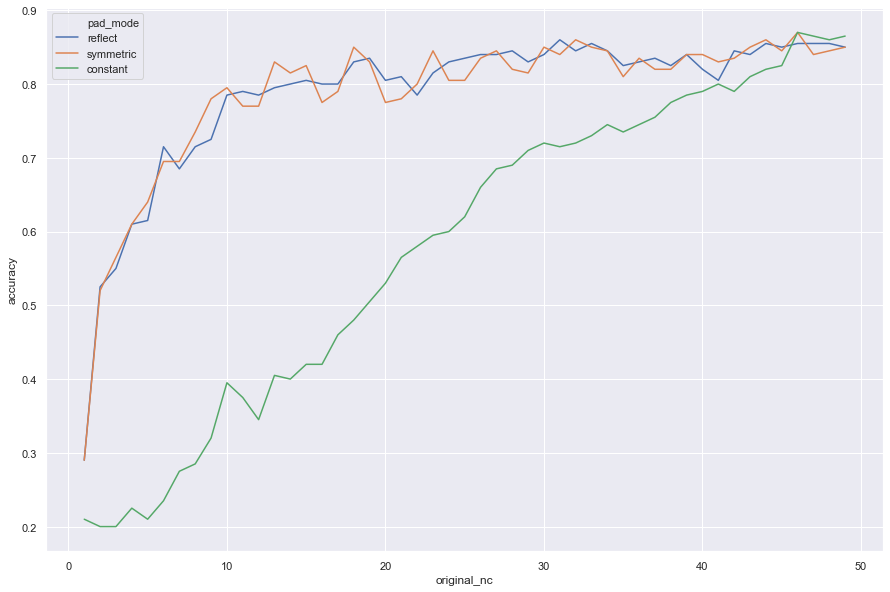

In [31]:
plt.figure(figsize=(15, 10))

ax = sns.lineplot(x='original_nc', y='accuracy', data=pad_df, hue='pad_mode')
plt.show()

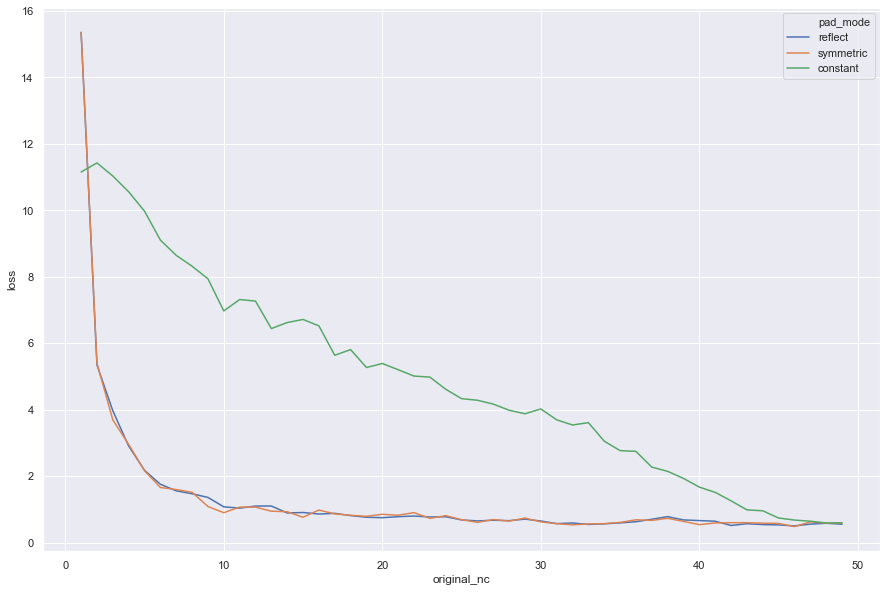

In [32]:
plt.figure(figsize=(15, 10))

ax = sns.lineplot(x='original_nc', y='loss', data=pad_df, hue='pad_mode')
plt.show()

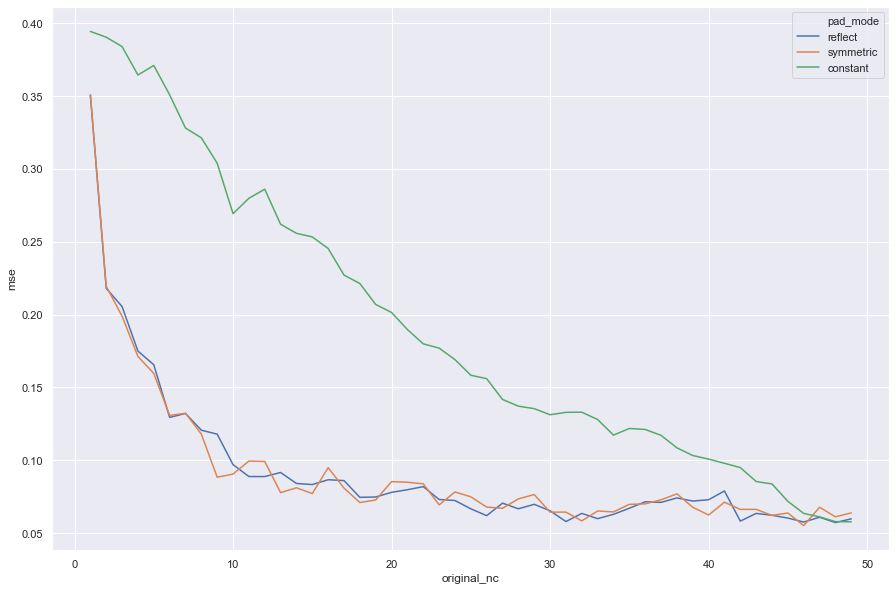

In [34]:
plt.figure(figsize=(15, 10))

ax = sns.lineplot(x='original_nc', y='mse', data=pad_df, hue='pad_mode')
plt.show()

In [273]:
pad_metrics_df_test = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="symmetric")

pad_metrics_df_reflective_test = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="reflect")

pad_metrics_df_constant_test = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="constant")

pad_df_test = pd.concat([pad_metrics_df_reflective_test, pad_metrics_df_test, pad_metrics_df_constant_test])
pad_df_test

75/75 [==============================] - 1s 8ms/sample - loss: 1.5789 - accuracy: 0.7467 - mae: 0.1216 - mse: 0.1132


75/75 [==============================] - 1s 9ms/sample - loss: 0.0311 - accuracy: 1.0000 - mae: 0.0139 - mse: 0.0027


,accuracy,loss,mae,mse,original_nc,pad_mode
0,0.20,20.603199,0.399996,0.398211,1,reflect
1,0.44,5.466110,0.275193,0.248444,2,reflect
2,0.55,3.671391,0.235913,0.210530,3,reflect
3,0.58,3.325098,0.208088,0.188749,4,reflect
4,0.67,2.298185,0.166143,0.145613,5,reflect
5,0.67,1.738949,0.159831,0.137866,6,reflect
6,0.70,1.733287,0.159244,0.136049,7,reflect
7,0.69,1.497659,0.149125,0.124969,8,reflect
8,0.70,1.655199,0.147072,0.130880,9,reflect
9,0.71,1.270788,0.140488,0.121237,10,reflect


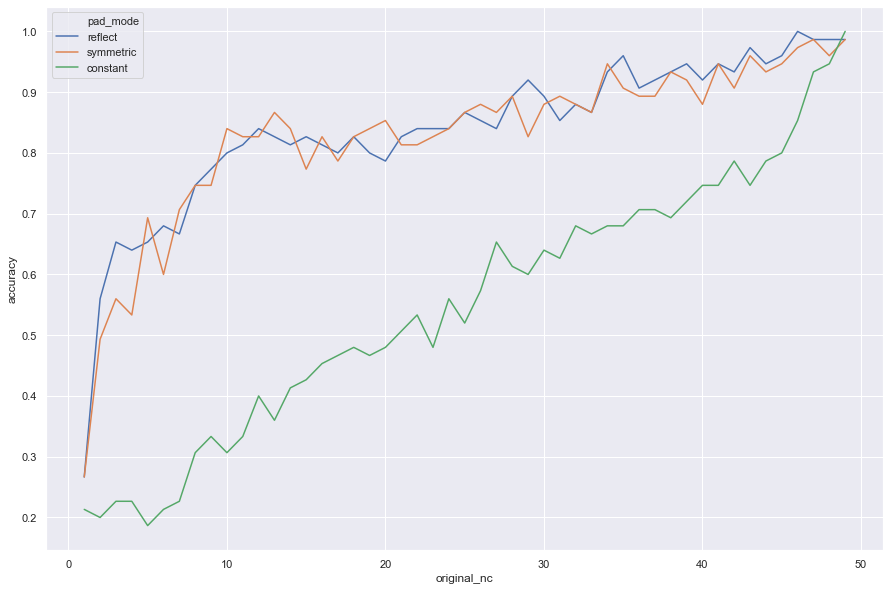

In [274]:
plt.figure(figsize=(15, 10))

ax = sns.lineplot(x='original_nc', y='accuracy', data=pad_df_test, hue='pad_mode')
plt.show()